In [ ]:
!pip install darts
!pip install pyyaml==5.4.1


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

In [43]:
import pandas as pd
from darts import TimeSeries
from darts.datasets.dataset_loaders import (
    DatasetLoader,
    DatasetLoaderCSV,
    DatasetLoaderMetadata,
    DatasetLoadingException,
)

dataset = DatasetLoaderCSV(
    metadata=DatasetLoaderMetadata(
        "wrong_hash",
        uri="https://raw.githubusercontent.com/icarocamelo/inf-6333-applied-ai/main/dataset/node1.csv",
        hash="3ac32f192170be9b4ced22060e1bbe66",
        header_time=None,
        format_time="%Y/%m/%d, %H:%M"
    )
)
dataset.load()
# df = pd.read_csv('https://raw.githubusercontent.com/icarocamelo/inf-6333-applied-ai/main/dataset/node1.csv', header=None, parse_dates=True)
# df.columns = ['Unix Timestamp', 'Timestamp', 'Busy System', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle']
# df = df.drop(columns=['Unix Timestamp', 'Busy User', 'Busy Iowait', 'Busy IRQs', 'Busy Other', 'Idle'])
# df.head(5)

TypeError: ignored

In [4]:
# loading library
import matplotlib.pyplot as plt
%matplotlib inline

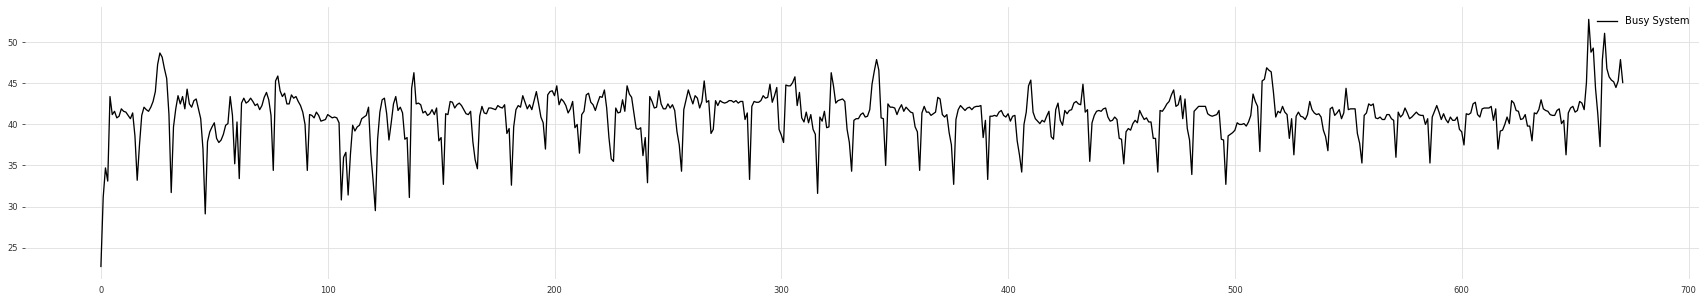

In [23]:
df.plot(label="Busy System", figsize=(30, 5))
plt.legend();

There is seasonality of order 6.
There is seasonality of order 15.


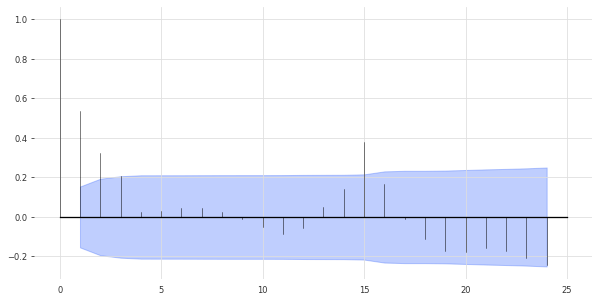

In [32]:
from darts.utils.statistics import plot_acf, check_seasonality
series = TimeSeries.from_dataframe(df, 'Timestamp', 'Busy System')
train, _ = series.split_before(pd.Timestamp('2022-03-04 23:48'))
# train
plot_acf(train, alpha=0.1)

for m in range(2, 25):
    is_seasonal, period = check_seasonality(train, m=m, alpha=0.05)
    if is_seasonal:
        print("There is seasonality of order {}.".format(period))

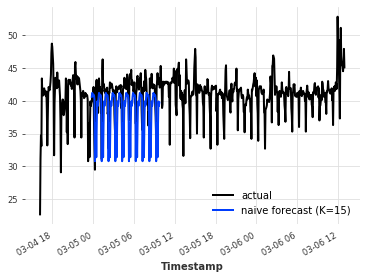

In [27]:
from darts.models import NaiveSeasonal
seasonal_model = NaiveSeasonal(K=15)
seasonal_model.fit(train)
seasonal_forecast = seasonal_model.predict(150)

series.plot(label="actual")
seasonal_forecast.plot(label="naive forecast (K=15)")